# Melanoma Detection Assignment
## By Pranav Pandey

### Problem statement:
##### To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## **Project Pipeline**
#### **Data Reading/Data Understanding** → Defining the path for train and test images
#### **Dataset Creation**→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
#### **Dataset visualisation** → Create a code to visualize one instance of all the nine classes present in the dataset
#### **Model Building & training** :
o	Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

o	Choose an appropriate optimiser and loss function for model training

o	Train the model for ~20 epochs

o	Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

#### **Chose an appropriate data augmentation strategy to resolve underfitting/overfitting**
#### **Model Building & training on the augmented data** :
o	Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).

o	Choose an appropriate optimiser and loss function for model training

o	Train the model for ~20 epochs

o	Write your findings after the model fit, see if the earlier issue is resolved or not?

#### **Class distribution: Examine the current class distribution in the training dataset**
o	- Which class has the least number of samples?

o	- Which classes dominate the data in terms of the proportionate number of samples?

•	Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
•	Model Building & training on the rectified class imbalance data :
o	Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

o	Choose an appropriate optimiser and loss function for model training

o	Train the model for ~30 epochs

o	Write your findings after the model fit, see if the issues are resolved or not?




### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### **STEP 1 : Importing all the important libraries**

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings('ignore')

import random
from skimage import io
from glob import glob

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
# Currenty my data resides in Google Drive so linking my drive to colab to fetch it.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### **STEP 2 : Fetch The Data From Data Source**

In [4]:
# Defining the path for train and test images
main_dir="/content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(main_dir+"/Train")
data_dir_test = pathlib.Path(main_dir+"/Test")

In [5]:
# Check the no of images present in test and train data set

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### **STEP 3 : Create a dataset**

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2, subset="training",
  seed=123, image_size=(img_height, img_width), batch_size=batch_size)


Found 6749 files belonging to 9 classes.
Using 5400 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",
  seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **STEP  4 : Visualize the data**

In [6]:
# Function to the total folders and count of files in each folder

def GetDirectory_Details(path):
  folder_lst = os.listdir(path)
  type_count= pd.DataFrame(columns=['Class', 'Count'])
  for x in folder_lst:
    count = sum([len(files) for r, d, files in os.walk(path+'/'+x)])
    type_count=type_count._append({"Class":x,"Count":count},ignore_index=True)
  return type_count

# Function to display image in different channels RGB

def Image_Channel_Show(img):
  f, (ax2, ax3, ax4) = plt.subplots(1, 3, sharey=True)
  f.set_figwidth(15)

  # RGB channels
  ax2.imshow(img[:, : , 0])
  ax3.imshow(img[:, : , 1])
  ax4.imshow(img[:, : , 2])
  f.suptitle('Different Channels of Image')

# Function to display image view
def Image_Show(img):
  plt.figure(figsize=(4, 4))
  plt.imshow(img.numpy().astype("uint8"))
  #print(img.shape)
  plt.axis("off")

In [ ]:
#Checking the train data count in train folder

df_train_count=GetDirectory_Details(main_dir+"/Train")
df_train_count

,Class,Count
0,vascular lesion,139
1,seborrheic keratosis,77
2,pigmented benign keratosis,462
3,squamous cell carcinoma,181
4,actinic keratosis,114
5,basal cell carcinoma,376
6,dermatofibroma,95
7,nevus,357
8,melanoma,448


In [ ]:
#Checking the train data count in test folder

GetDirectory_Details(main_dir+"/Test")

,Class,Count
0,seborrheic keratosis,3
1,squamous cell carcinoma,16
2,vascular lesion,3
3,pigmented benign keratosis,16
4,basal cell carcinoma,16
5,dermatofibroma,16
6,melanoma,16
7,nevus,16
8,actinic keratosis,16


In [ ]:
#Showing image from each class/category

for img, lab in train_ds.take(1):
  for i in range(9):
    #Logic To Show Image
    Image_Show(img[i])
    #Logic To Show Channel Image
    Image_Channel_Show(img[i])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# plotting the original image and the RGB channels


<Axes: xlabel='Count', ylabel='Class'>

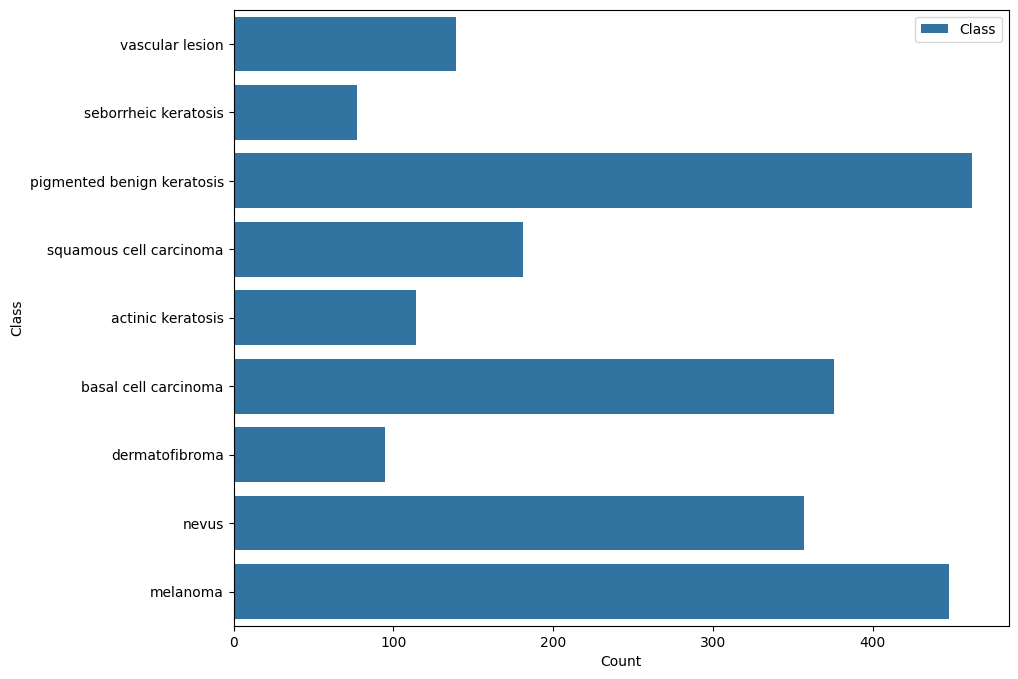

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Class", data=df_train_count,
            label="Class")

### **STEP 4 : Model Designing - Model 1**
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural *network*. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
#Train Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
# Validating Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#CNN Model Architecture
#Deisgning Each Layer , Defining the Activation Function Etc


#Sequential allows you to create models layer-by-layer as per our requirement
model = Sequential()

#Rescaling Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

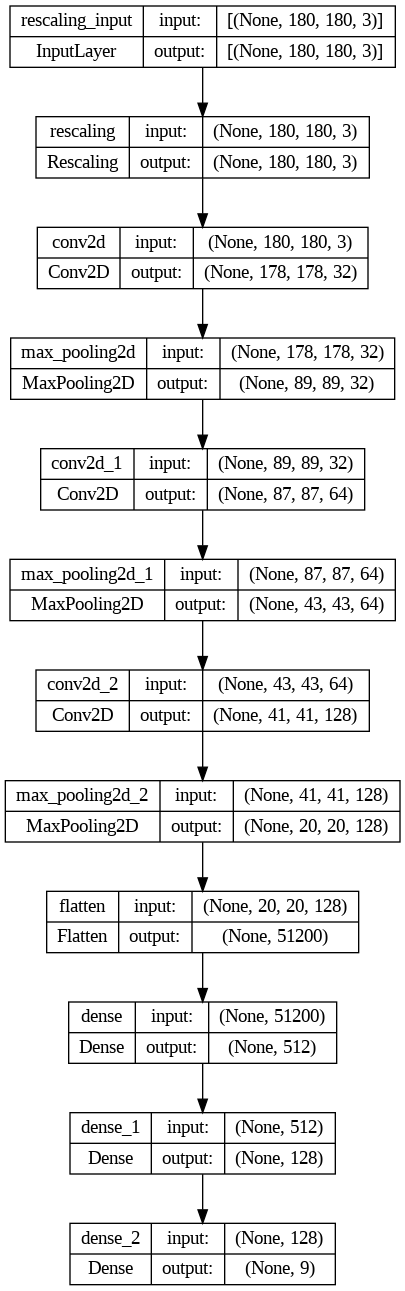

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cancer_model_diagram.png', show_shapes=True, show_layer_names=True)

### **STEP 5 : Compile the model**
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam', loss="categorical_crossentropy",  metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### **STEP 6 :Train the model**

In [ ]:
#epochs = 20
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
57/57 [==============================] - 444s 4s/step - loss: 2.0177 - accuracy: 0.2300 - val_loss: 1.8623 - val_accuracy: 0.2806
Epoch 2/20
57/57 [==============================] - 137s 2s/step - loss: 1.7712 - accuracy: 0.3694 - val_loss: 1.7946 - val_accuracy: 0.3474
Epoch 3/20
57/57 [==============================] - 136s 2s/step - loss: 1.5390 - accuracy: 0.4678 - val_loss: 1.4474 - val_accuracy: 0.4855
Epoch 4/20
57/57 [==============================] - 136s 2s/step - loss: 1.4219 - accuracy: 0.5061 - val_loss: 1.4184 - val_accuracy: 0.5100
Epoch 5/20
57/57 [==============================] - 135s 2s/step - loss: 1.3555 - accuracy: 0.5428 - val_loss: 1.4088 - val_accuracy: 0.4967
Epoch 6/20
57/57 [==============================] - 135s 2s/step - loss: 1.2934 - accuracy: 0.5472 - val_loss: 1.4928 - val_accuracy: 0.4610
Epoch 7/20
57/57 [==============================] - 132s 2s/step - loss: 1.2439 - accuracy: 0.5739 - val_loss: 1.4037 - val_accuracy: 0.4967
Epoch 8/20
57

### **STEP 7 : Visualizing training results**

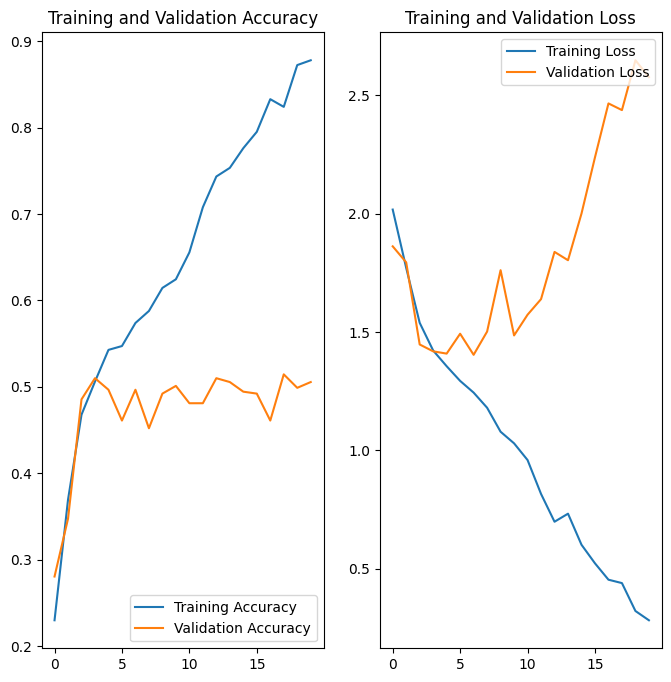

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### **STEP 8 : Findings After First Training**

#### After training the model we found that the model is overfitting .As you can see in the above graph that there is a significant difference between the accuracy and validation accuracy.
#### **Also the training accuracy is 0.8778 which validation accuracy is 0.5056 indicating overfitting.**

### **STEP 9 : Data Augmention Strategy**
## Here we will try to use data augmentation strategy along with dropout to resolve the overfitting issue.

In [ ]:
rescale_df = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),

  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),

  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

<Figure size 1000x1000 with 0 Axes>

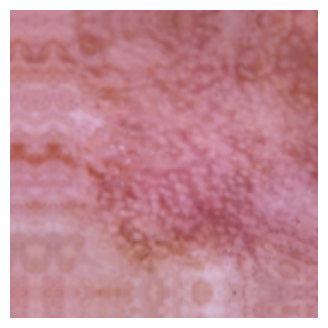

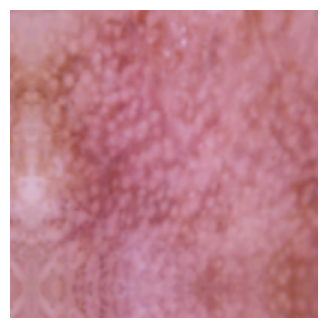

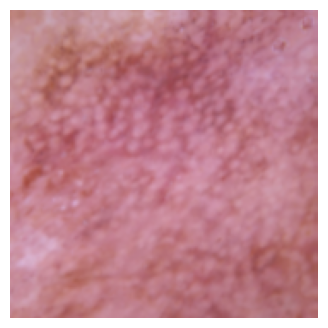

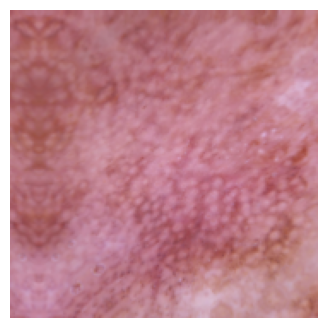

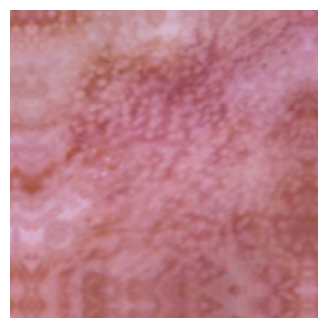

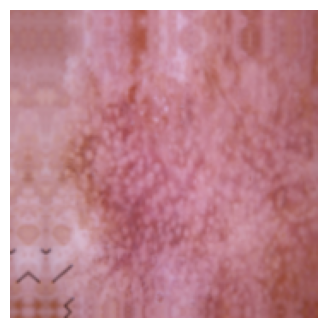

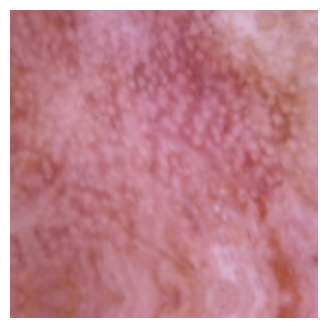

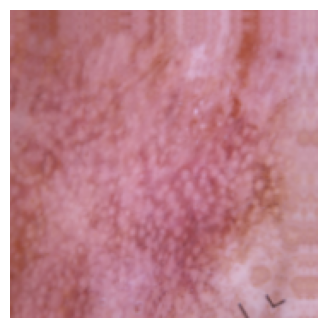

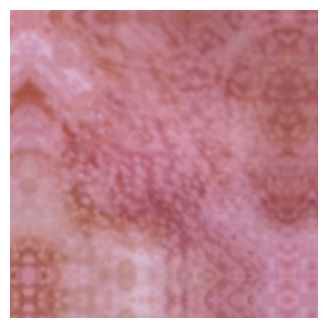

In [ ]:
#Checking Sample Images Genrated By Augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        Image_Show(augmented_images[0])

### **STEP 10 : Model Designing - Model 2 With Dropouts**

In [ ]:
## Model 2 With Dropouts

#Sequential For Layer By Layer Creation
model2 = Sequential()

#Augmentation
model2.add(data_augmentation)
#Rescaling
model2.add(rescale_df)

#First Convolution Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input drop.
model2.add(layers.Dropout(0.25))

#Second Convolution Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input drop.
model2.add(layers.Dropout(0.25))

#Third Convolution Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Flattens multi-dimensional input into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
model2.add(layers.Dense(len(class_names),activation='softmax'))


In [ ]:
#Compile The Model
model2.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#Training The Model
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
57/57 [==============================] - 163s 3s/step - loss: 2.4002 - accuracy: 0.2350 - val_loss: 1.9620 - val_accuracy: 0.2695
Epoch 2/20
57/57 [==============================] - 156s 3s/step - loss: 1.9400 - accuracy: 0.2717 - val_loss: 1.8697 - val_accuracy: 0.3073
Epoch 3/20
57/57 [==============================] - 156s 3s/step - loss: 1.7570 - accuracy: 0.3594 - val_loss: 1.6919 - val_accuracy: 0.3964
Epoch 4/20
57/57 [==============================] - 154s 3s/step - loss: 1.7573 - accuracy: 0.3667 - val_loss: 1.8079 - val_accuracy: 0.3073
Epoch 5/20
57/57 [==============================] - 154s 3s/step - loss: 1.6873 - accuracy: 0.3994 - val_loss: 1.6178 - val_accuracy: 0.3875
Epoch 6/20
57/57 [==============================] - 154s 3s/step - loss: 1.6671 - accuracy: 0.4017 - val_loss: 1.6364 - val_accuracy: 0.4031
Epoch 7/20
57/57 [==============================] - 155s 3s/step - loss: 1.5926 - accuracy: 0.4422 - val_loss: 1.5178 - val_accuracy: 0.4677
Epoch 8/20
57

### **Visualizing The Result**

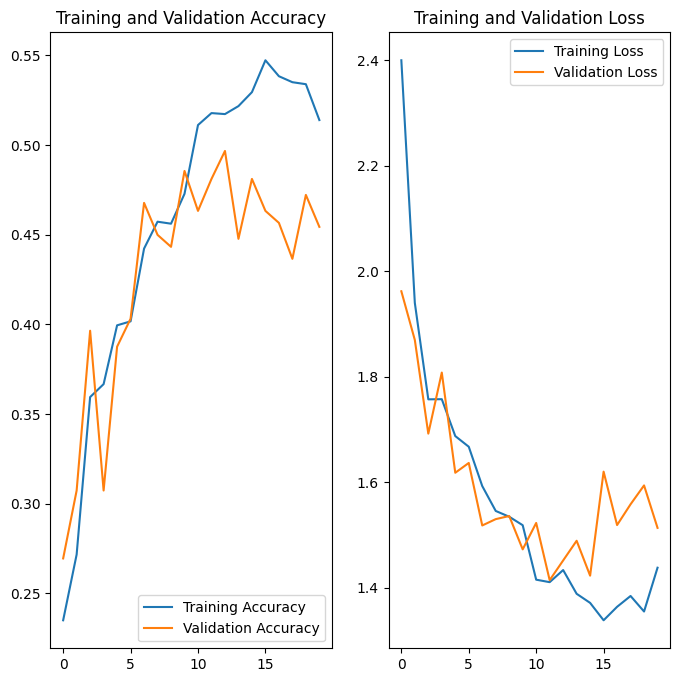

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## After using augmentation and dropout the overfitting problem seems to have reduced but the performance is still low for the model. From the previous data visualization we have found the class imbalance is there in the input images. We will try to correct the class imbalance issue and will try again.

### **STEP 11 : Resolving Class Imbalance**

In [1]:
!pip install Augmentor

In [11]:
# We are adding 500 samples per class to make sure that none of the classes are sparse.
path_to_training_dataset=main_dir+"/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D59E82CB5B0>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D59E82E2E90>: 100%|██████████| 500/500 [00:20<00:00, 24.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D59EC02F520>: 100%|██████████| 500/500 [00:20<00:00, 24.16 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D59E8122290>: 100%|██████████| 500/500 [01:42<00:00,  4.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2155x1958 at 0x7D59E81653F0>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D59E8177400>: 100%|██████████| 500/500 [00:24<00:00, 20.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D59E82AEDD0>: 100%|██████████| 500/500 [00:40<00:00, 12.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D59E814B310>: 100%|██████████| 500/500 [00:18<00:00, 26.67 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Upgrad Assignment/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D59EC0B2B90>: 100%|██████████| 500/500 [00:18<00:00, 27.44 Samples/s]


In [13]:
#Getting Path List for Each category With Folter Output
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

#Dataframe To Store Path and Category Label For Images Generated By Augmentation
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

#Checking The Image Count For Each Label
df2['Label'].value_counts()

Label
actinic keratosis             500
dermatofibroma                500
seborrheic keratosis          500
basal cell carcinoma          500
pigmented benign keratosis    500
melanoma                      500
vascular lesion               500
nevus                         500
squamous cell carcinoma       500
Name: count, dtype: int64

### **Now we have added 500 images to all the classes to maintain some class balance.**

### **STEP 12 : Model Designing - Model 3 With Class Balanced Images**

In [15]:
data_dir_train=main_dir+"/Train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123,validation_split = 0.2,subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  batch_size=batch_size)



Found 6749 files belonging to 9 classes.
Using 5400 files for training.


In [16]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split = 0.2,subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical', batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


In [17]:
#Final Model : Model 3

#Sequential allows you to create models layer-by-layer
model3 = Sequential()

model3.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model3.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model3.add(layers.Dense(len(class_names),activation='softmax'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

In [18]:
#Compiling The Model
model3.compile(optimizer='Adam',loss="categorical_crossentropy", metrics=['accuracy'])


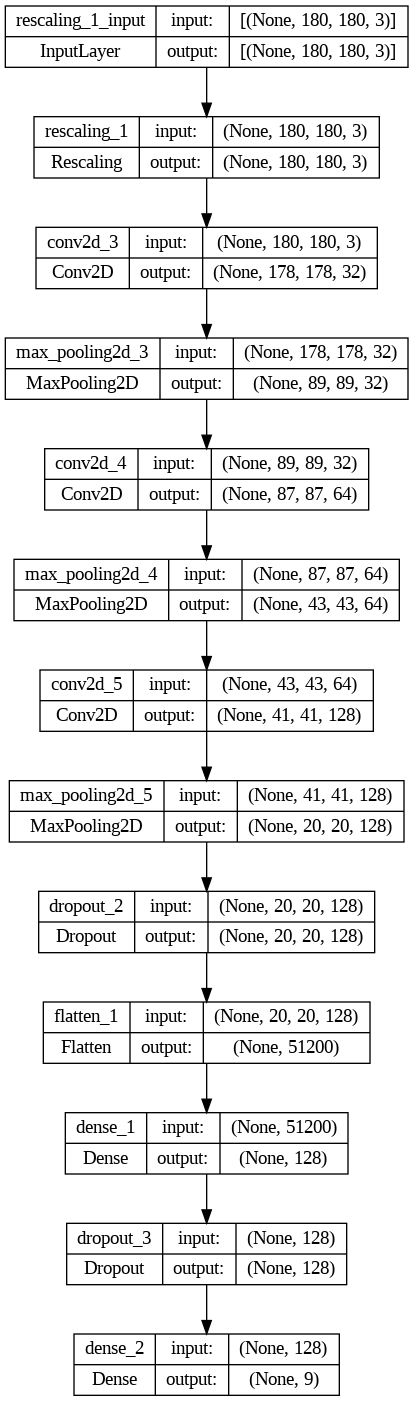

In [19]:
#Digital representation of model
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file='model_3.png', show_shapes=True, show_layer_names=True)

In [20]:
epochs = 30
history = model3.fit(train_ds, validation_data=val_ds, epochs=epochs,verbose=1)

Epoch 1/30
169/169 [==============================] - 970s 6s/step - loss: 1.8118 - accuracy: 0.3126 - val_loss: 1.4870 - val_accuracy: 0.4559
Epoch 2/30
169/169 [==============================] - 429s 3s/step - loss: 1.4740 - accuracy: 0.4439 - val_loss: 1.3771 - val_accuracy: 0.4744
Epoch 3/30
169/169 [==============================] - 425s 3s/step - loss: 1.3403 - accuracy: 0.4965 - val_loss: 1.2532 - val_accuracy: 0.5411
Epoch 4/30
169/169 [==============================] - 424s 2s/step - loss: 1.2287 - accuracy: 0.5383 - val_loss: 1.1347 - val_accuracy: 0.5856
Epoch 5/30
169/169 [==============================] - 424s 2s/step - loss: 1.1102 - accuracy: 0.5793 - val_loss: 1.0761 - val_accuracy: 0.5960
Epoch 6/30
169/169 [==============================] - 425s 3s/step - loss: 1.0372 - accuracy: 0.6167 - val_loss: 0.9914 - val_accuracy: 0.6383
Epoch 7/30
169/169 [==============================] - 421s 2s/step - loss: 0.9479 - accuracy: 0.6461 - val_loss: 0.9120 - val_accuracy: 0.6642

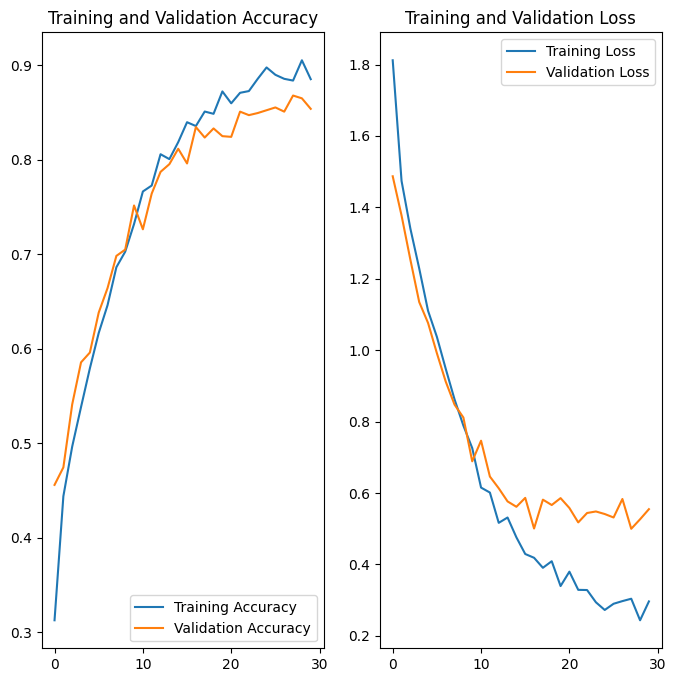

In [21]:
#Displaying the Graph comparision of loss and accuracy of test and train data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **STEP 13 : Model Prediction**

1/1 [==============================] - 0s 57ms/step
Actual Class melanoma
Predictive Class melanoma


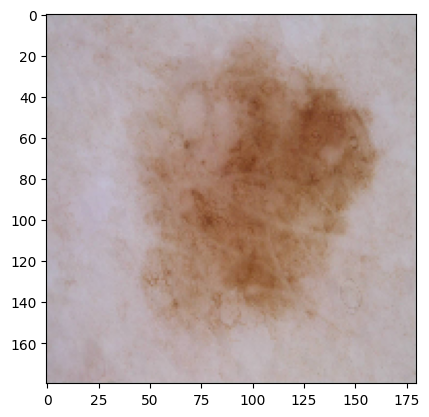

In [48]:
#Testing model with test images of some categories
from glob import glob
Test_image_path = os.path.join(main_dir+"/Test/", class_names[3], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model3.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[3] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 36ms/step
Actual Class nevus
Predictive Class nevus


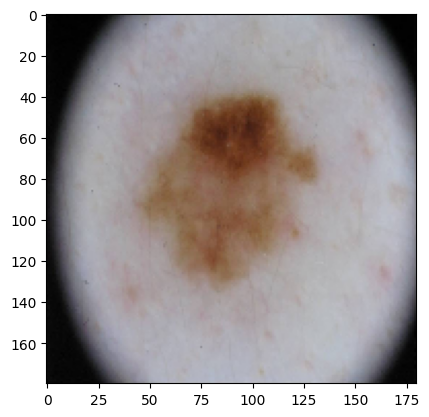

In [49]:
from glob import glob
Test_image_path = os.path.join(main_dir+"/Test/", class_names[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model3.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[4] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 41ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


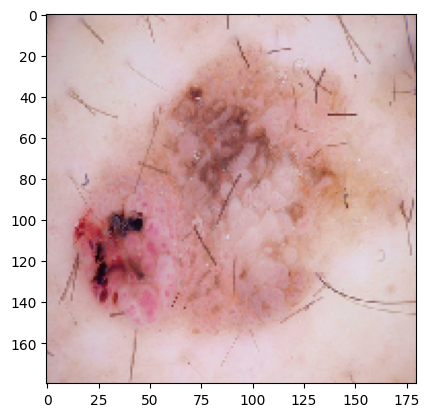

In [50]:
from glob import glob
Test_image_path = os.path.join(main_dir+"/Test/", class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model3.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )

### **STEP 14 : Final Prediction**

## **Did you get rid of underfitting/overfitting?**
### Previous model had overfitting issue which we tried to resolve by adding dropout logic and augmentation mechanism.

## **Did class rebalance help?**
### Since number of images for each class was not fixed. Some had less image so we tried creating sample images using augmentation to resolve the class imbalance issue. We created 500 samples for each category which helped used to increase the performance of the model as well.